In [1]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('display.precision', 3)

In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame({'score': scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 2.1 데이터 중심의 지표

+ 대푯값: 데이터를 하나의 값으로 요약한 지표

### 2.1.1 평균값

In [5]:
sum(scores) / len(scores)

55.0

In [6]:
np.mean(scores)

55.0

In [7]:
scores_df.mean()

score    55.0
dtype: float64

### 2.1.2 중앙값

+ 중앙값(median): 데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값
    - 중앙값은 평균값에 비해 이상값에 강하다는 특성이 있다. 즉 이상값에 영향을 덜 받는다는 의미
    - 데이터의 개수 n이 홀수라면, (n+1)/2번째 데이터가 중앙값
    - 데이터의 개수 n이 짝수라면, n/2번째 데이터와 (n/2)+1번째 데이터의 평균이 중앙값

In [8]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [9]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 -1]
    
median

56.5

In [10]:
np.median(scores)

56.5

In [11]:
scores_df.median()

score    56.5
dtype: float64

### 2.1.3 최빈값

+ 최빈값(mode): 데이터에서 가장 많이 나타나는 값
    - 최빈값은 기본적으로는 질적 데이터의 기본값을 구할 때 사용하는 지표
    - 다만 도수분포표를 도입하면 양적 데이터에서도 최빈값을 자연스럽게 정의할 수 있다

In [12]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

## 2.2 데이터의 산포도

### 2.2.1 분산과 표준편차

+ 편차 deviation
    - 편차는 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표

In [13]:
mean = np.mean(scores)

deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [14]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [15]:
np.mean(deviation)

0.0

In [16]:
np.mean(another_scores)

55.0

In [17]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [18]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

+ 분산

In [19]:
np.mean(deviation**2)

86.0

In [20]:
np.var(scores)

86.0

In [21]:
scores_df.var()

score    95.556
dtype: float64

In [22]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [23]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

+ 표준편차 standard deviation

In [24]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [25]:
np.std(scores, ddof=0)

9.273618495495704

### 2.2.2 범위와 사분위 범위

+ 범위 range
    - 데이터의 최댓값과 최소값만으로 산포도를 표현하는 방법
    - 최댓값과 최소값의 차이가 크면 산포도가 크고, 그 차이가 작으면 산포도도 작다는 의미
    - 간단히 계산할 수 있지만, 값이 2개뿐이므로 개략적인 지표이고 이상값에 약하다

In [26]:
np.max(scores) - np.min(scores)

28

+ 사분위 범위 interquartile range
    - IQR = Q3 - Q1

In [27]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### 2.2.3 데이터의 지표 정리

In [28]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2.3 데이터의 정규화

+ 정규화 nomalization
    - 데이터를 통일된 지표로 변환하는 것
    - 정규화를 통해 다양한 데이터를 동일한 기준으로 다룰 수 있기 때문에, 데이터를 분석할 때 정규화는 일반적으로 사용하는 수단

### 2.3.1 표준화

+ 표준화 standardization
    - 데이터에서 평균을 빼고 표준편차로 나누는 작업
    - 표준화된 데이터를 표준화 변량 standardized data나 Z 점수 z-score라고 한다.

In [29]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

+ 표준화된 데이터는 평균이 0, 표준편차가 1이다.

In [30]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 2.3.2 편찻값

+ 편찻값
    - 평균이 50, 표준편차가 10이 되도록 정규화한 값

In [31]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [32]:
np.mean(z), np.std(z)

(50.0, 10.000000000000002)

In [33]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 2.4 1차원 데이터의 시각화

In [35]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])

# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 2.4.1 도수분포표

+ 데이터의 분포 상태를 세부적으로 알고 싶을 때. 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법
+ 분할된 구간과 데이터의 개수를 표로 정리한 것

+ 구간을 계급 class, 각 계급에 속한 학생 수를 도수 frequency. 각 구간의 폭을 계급폭, 계급의 수를 계급수.

In [37]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [40]:
# 0~10, 10~20, ... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency': freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


+ 계급값
    - 각 계급을 대표하는 값으로, 계급의 중앙값이 이용된다.
    - 60~70의 계급이면 계급값은 65이다.

In [41]:
class_value = [(i + (i+10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

+ 상대도수
    - 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지를 나타낸다.

In [42]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

+ 누적상대도수
    - 해당 계급까지의 상대도수의 합을 나타낸다.
    - 누적합을 계산할 때 np.cumsum 함수를 사용하면 편리

In [44]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [48]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


+ 최빈값 재검토
    - 양적 데이터에 대해서도 자연스럽게 최빈값을 구할 수 있다.
    - 도수분포표를 사용한 최빈값은 최대가 되는 계급의 계급값으로 정의된다.

In [49]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

+ 최빈값은 도수분포표를 만드는 방법에 의존한다.
+ 계급폭을 4점으로 하여 도수분포표를 계산하면 최빈값은 66점이다.

###  2.4.2 히스토그램 histogram

+ 도수분포표를 막대그래프로 나타낸 것. 히스토그램을 사용하여 데이터의 분포 상태를 시각적으로 파악할 수 있다.

In [51]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 Jupyter notebook 위에 표시
%matplotlib inline

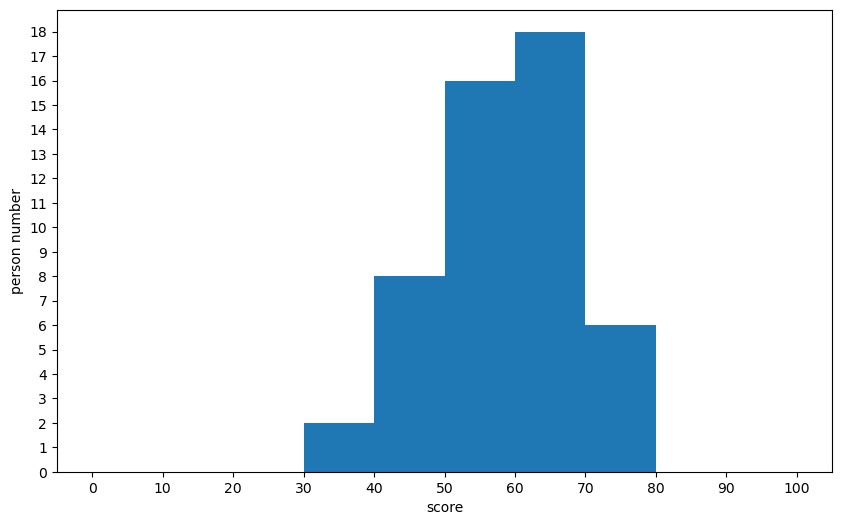

In [52]:
# 캔버스를 생성
# figsize로 가로, 세로 크기를 지정
fig = plt.figure(figsize=(10, 6))

# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1 x 1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# X축에 레이블 부여
ax.set_xlabel('score')

# Y축에 레이블 부여
ax.set_ylabel('person number')

# X축을 0, 10, 20, ... 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))

# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))

# 그래프 표시
plt.show()